<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predicting Insurance Charges." </div>

Develop a model to predict the insurance charges (**charges**). This model can help the insurance company in setting premiums more accurately.

- [1. Load the dataset](#1)

- [2.Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Exploring the dataset](#1.1)
    - [2.2 Data Cleaning](#1.3)
        - [2.3 Missing Value](#1.3.1)
        - [2.3.2 Duplicated](#1.3.2)
        - [2.3.3 Outliter](#1.3.3)
     
    - [2.3 Diagnostics Analytics](#2.3)
- [3. Data preprocessing and feature engineering](#4)
  
    - [3.1 Min-Max Scaling or Standardization?](#4.1)
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding](#5.2)
       - [4.1.1 Feature selection](#5.2.1)
           - [4.1.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
- [5. Model Evaluation](#6) 


## 1. Exploring The dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # linearRegression.fit(x_train, y_train)

# from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('insurance.csv')

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
data.iloc[200:205]

,age,sex,bmi,children,smoker,region,charges
200,19,female,32.110,0,no,northwest,2130.67590
201,48,female,32.230,1,no,southeast,8871.15170
202,60,female,24.035,0,no,northwest,13012.20865
203,27,female,36.080,0,yes,southeast,37133.89820
204,46,male,22.300,0,no,southwest,7147.10500


In [12]:
data.loc[200:205]

,age,sex,bmi,children,smoker,region,charges
200,19,female,32.110,0,no,northwest,2130.67590
201,48,female,32.230,1,no,southeast,8871.15170
202,60,female,24.035,0,no,northwest,13012.20865
203,27,female,36.080,0,yes,southeast,37133.89820
204,46,male,22.300,0,no,southwest,7147.10500
205,28,female,28.880,1,no,northeast,4337.73520


# 2. Exploratory Data Analysis (EDA)

### 2.1 Discovering

In [13]:
data.shape

(1338, 7)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2.2 Joining

### 2.3 Validating
You perform a quick check that the new data doesn’t have mistakes or misspellings.

### 2.4 Structuring
You structure the data in different time periods and segments to understand trends. 
### 2.5 Validating
You do another quick check to ensure the new columns you’ve made in structuring are correctly designed. 


### 2.6 Cleaning
You check for outliers, missing data, and needs for conversions or transformations, 


#### 2.6.1 Missing values

In [17]:
## check missing value
data.isnull().sum()
data.dropna() ## drop missing value


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 2.6.2 duplicated


In [19]:
data.duplicated().sum() ## check duplicated
data.drop_duplicates(inplace=True)

### 2.6.3 Outlier


### Age

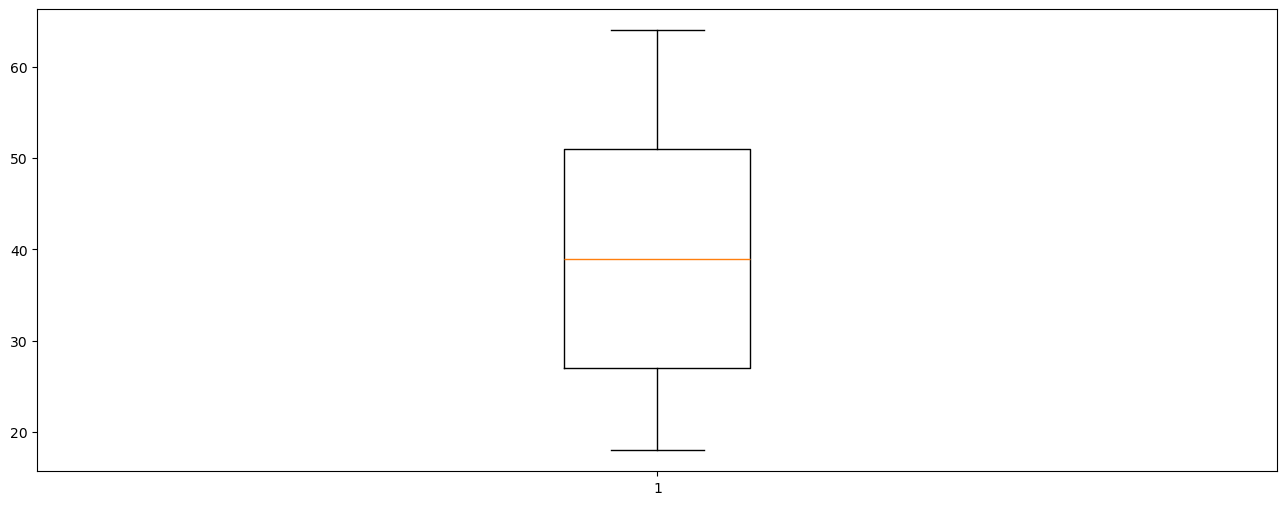

In [29]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.boxplot(x = data['age'])
plt.show()

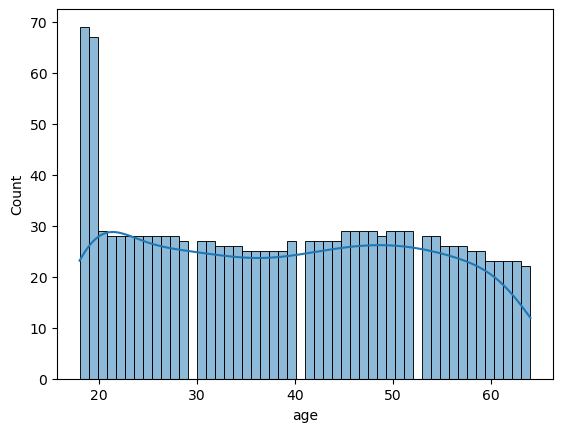

In [39]:
sns.histplot(x = data['age'], kde=True, bins = 50)
plt.show()
## kernel density estimate (KDE)

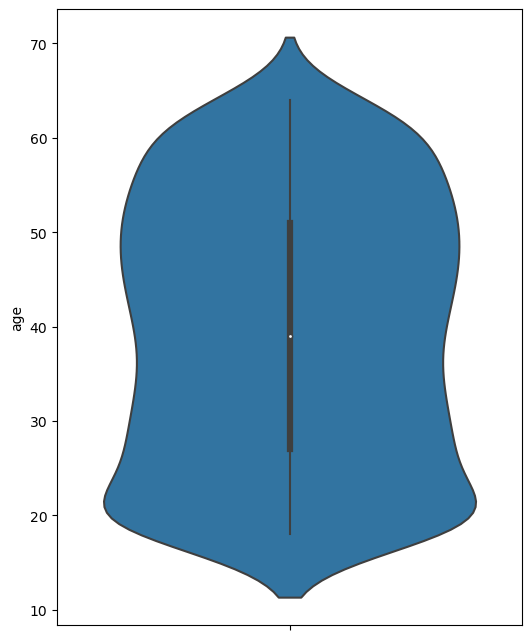

In [34]:
fig, ax = plt.subplots(figsize = (6, 8))
sns.violinplot(y = data['age'])
plt.show()

<Axes: xlabel='age'>

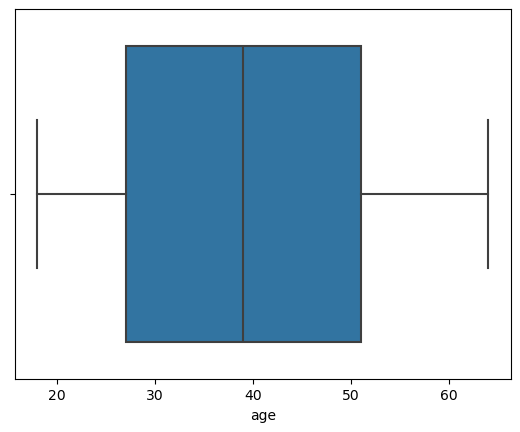

In [23]:
sns.boxplot(x = data['age'])

In [40]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### charges

In [44]:
data['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

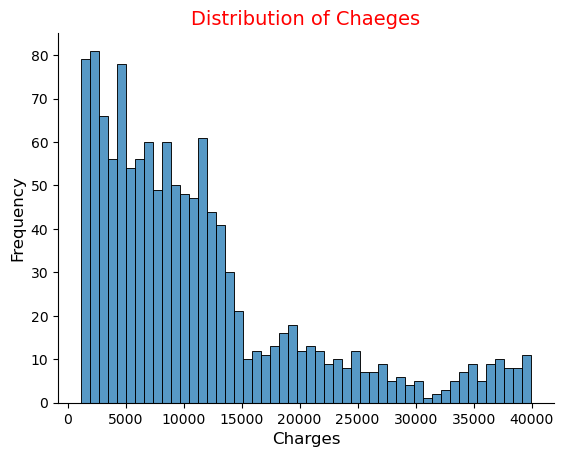

In [58]:
fig, ax = plt.subplots()
sns.histplot(x = data['charges'], bins = 50)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title('Distribution of Chaeges', fontsize = 14, color ='r')
ax.set_xlabel('Charges', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
fig.savefig('Distribution of Charges.png', dpi= 300)
plt.show()

<Axes: >

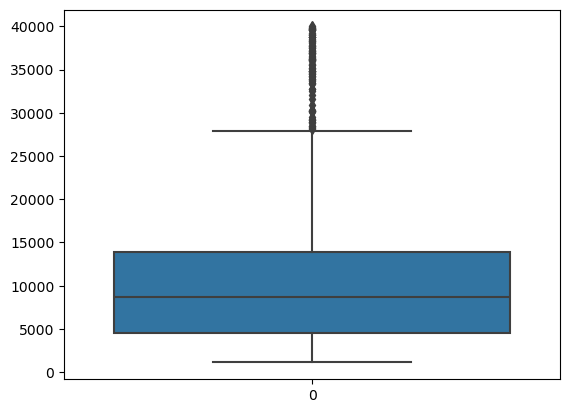

In [57]:
sns.boxplot(data['charges'])

In [54]:
data[data['charges']>40000].index

Index([  34,   39,   55,   86,   94,  109,  146,  175,  185,  251,  252,  254,
        256,  265,  271,  281,  288,  292,  312,  327,  328,  330,  338,  381,
        420,  421,  488,  530,  543,  549,  569,  577,  587,  615,  621,  629,
        665,  667,  668,  674,  677,  682,  697,  706,  725,  736,  739,  742,
        819,  826,  845,  852,  856,  860,  883,  893,  901,  951,  956,  958,
       1022, 1031, 1047, 1062, 1090, 1096, 1111, 1122, 1124, 1146, 1152, 1218,
       1230, 1240, 1241, 1284, 1300, 1301, 1323],
      dtype='int64')

In [56]:
data.drop(index = data[data['charges']>40000].index,inplace=True)

In [61]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [62]:
data_numeric = ['age', 'bmi', 'charges']
data_categorical = ['sex', 'smoker','region' ]

In [64]:
data[data_categorical]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [63]:
data[data_numeric]

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


<Axes: >

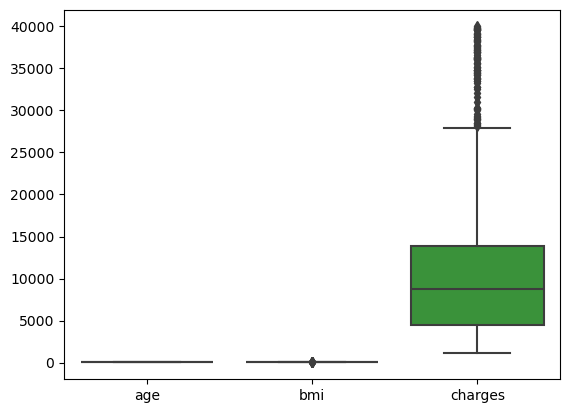

In [66]:
sns.boxplot(data[data_numeric])

In [67]:
data[data_categorical]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [69]:
data['sex'].value_counts()

sex
female    630
male      628
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

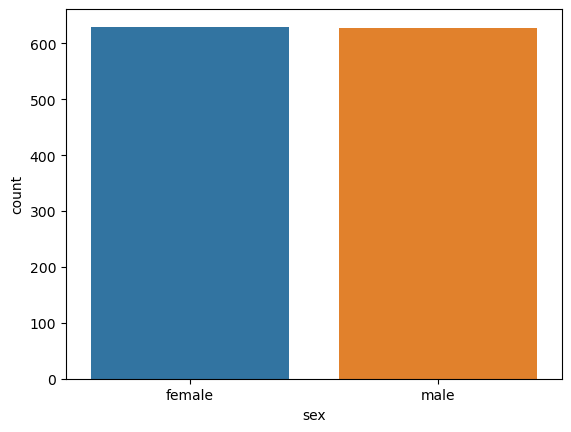

In [70]:
sns.countplot(x = data['sex'])

In [72]:
data['region'].value_counts()

region
southeast    328
southwest    311
northwest    310
northeast    309
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

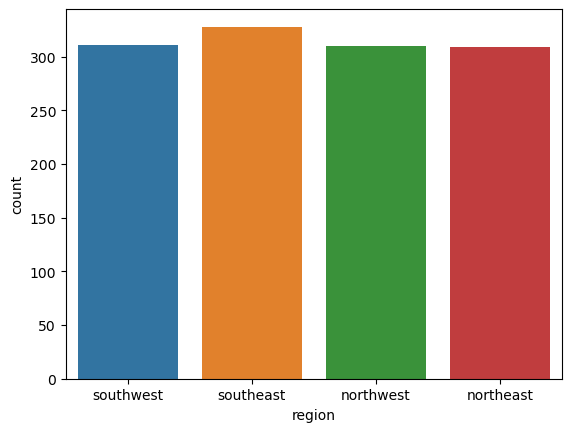

In [71]:
sns.countplot(x = data['region'])

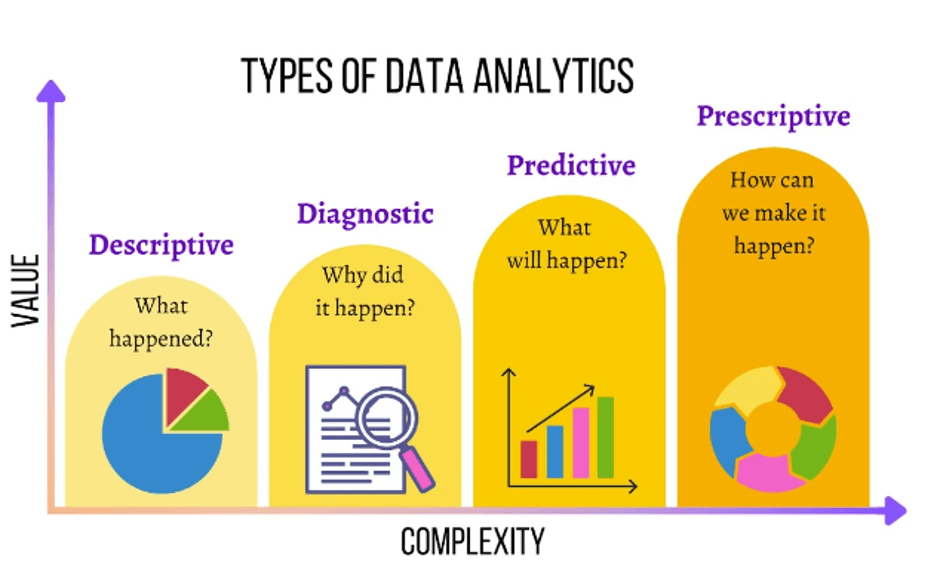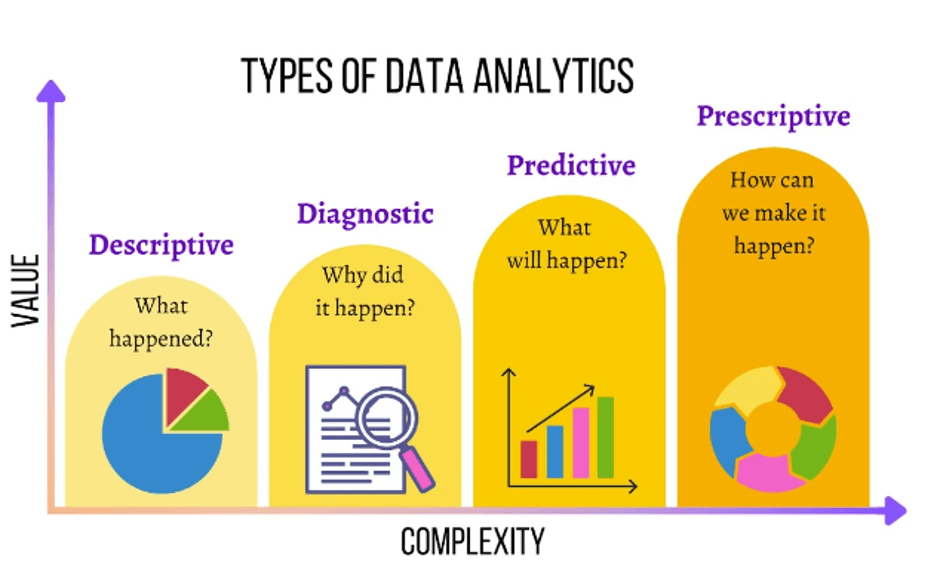

## Diagnostics


In [79]:
data[data_numeric]

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [88]:
data_numeric = ['children','age', 'bmi', 'charges']

### correlation coefficient

## Scatter plot

<Axes: xlabel='children', ylabel='charges'>

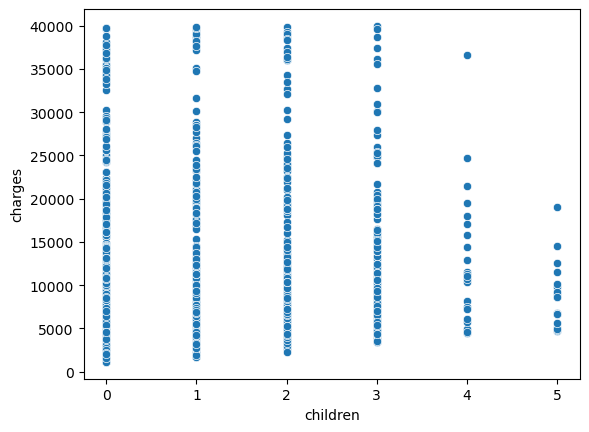

In [90]:
sns.scatterplot(x = data['children'], y = data['charges'])

<Axes: xlabel='age', ylabel='charges'>

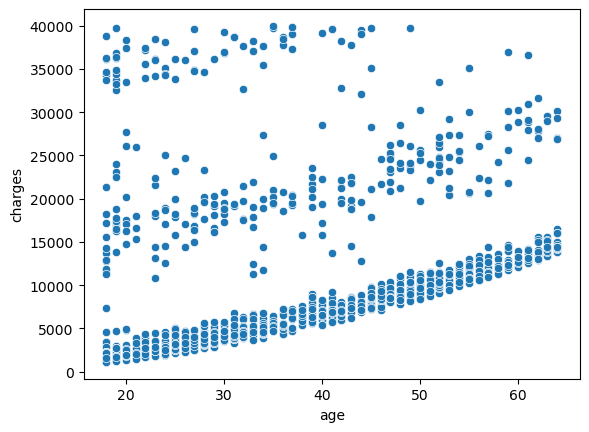

In [91]:
sns.scatterplot(x = data['age'], y = data['charges'])

In [89]:
data[data_numeric].corr()

,children,age,bmi,charges
children,1.000000,0.045683,-0.000282,0.058695
age,0.045683,1.000000,0.086214,0.253241
bmi,-0.000282,0.086214,1.000000,0.041300
charges,0.058695,0.253241,0.041300,1.000000


## 3. Data preprocessing

In [94]:
data['charges'].describe()

count     1258.000000
mean     11244.344235
std       9182.733316
min       1121.873900
25%       4527.756463
50%       8749.239125
75%      13911.859300
max      39983.425950
Name: charges, dtype: float64

In [99]:
data.shape

(1258, 7)

In [100]:
1258*.8

1006.4000000000001

In [102]:
data.drop(index = data[data['charges']>17000].index, inplace=True)

In [105]:
data[data_numeric].corr()

,children,age,bmi,charges
children,1.000000,0.049576,0.016409,0.140932
age,0.049576,1.000000,0.144139,0.815179
bmi,0.016409,0.144139,1.000000,0.043406
charges,0.140932,0.815179,0.043406,1.000000


In [110]:
x = np.arange(2, 50, 5)
x

array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])

In [111]:
y = x*2 -3


In [112]:
y

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

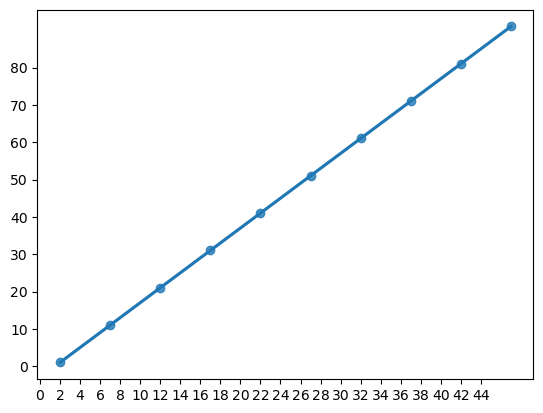

In [117]:
sns.regplot(x = x, y = y)
plt.xticks(np.arange(0, 45, 2))
plt.yticks(np.arange(0, 90, 10))
plt.show()

<Axes: xlabel='age', ylabel='charges'>

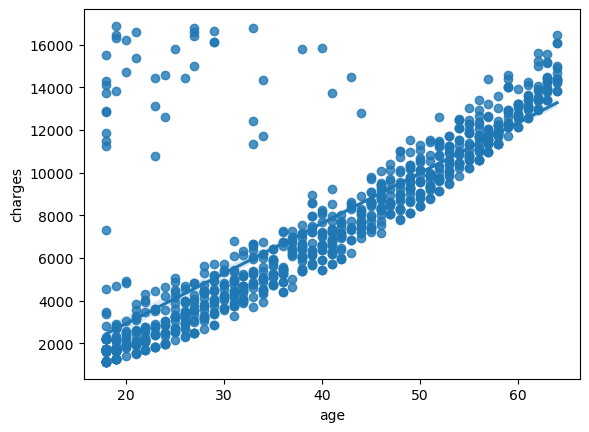

In [107]:
sns.regplot(x = data['age'], y = data['charges'])

In [124]:
data.drop(index = data[(data['age']<30 )& (data['charges']>10000)].index, inplace=True)

In [125]:
data

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [119]:
100 * len(data[(data['age']<30 )& (data['charges']>10000)])/data.shape[0]

3.081510934393638

In [103]:
data['charges'].quantile([0, 0.80])

0.0     1121.8739
0.8    11454.0215
Name: charges, dtype: float64

## change value as string to numeric

In [146]:
df = data.copy()

In [147]:
df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [148]:
df['sex'].replace({'female':1,
                  'male':0}, inplace=True)

In [149]:
df['smoker'].replace({'no':0,
                     'yes':1}, inplace=True)

In [150]:
df['region'].value_counts()

region
southwest    253
southeast    247
northwest    244
northeast    231
Name: count, dtype: int64

In [158]:
df = pd.get_dummies(data = df, prefix= 'region')

In [77]:
data['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [79]:
data['sex'].replace({'male':1, 
                    'female':0}, inplace=True)

In [80]:
data['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [81]:
data['smoker'].replace({'no':0,
                      'yes':1},inplace=True)

In [83]:
# #Label Encoding for (categorical variables)
# data['sex_l'] = LabelEncoder().fit_transform(data['sex'])
# data['smoker_l'] = LabelEncoder().fit_transform(data['smoker'])
# # data['region_l'] = LabelEncoder().fit_transform(data['region'])
# data

In [82]:
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,southwest,16884.92400
1,18.0,1,33.770,1,0,southeast,1725.55230
2,28.0,1,33.000,3,0,southeast,4449.46200
3,33.0,1,22.705,0,0,northwest,21984.47061
4,32.0,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,northwest,10600.54830
1334,18.0,0,31.920,0,0,northeast,2205.98080
1335,18.0,0,36.850,0,0,southeast,1629.83350
1336,21.0,0,25.800,0,0,southwest,2007.94500


In [84]:
data = pd.get_dummies(data, columns=['region'])

In [85]:
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0,1,16884.92400,False,False,False,True
1,18.0,1,33.770,1,0,1725.55230,False,False,True,False
2,28.0,1,33.000,3,0,4449.46200,False,False,True,False
3,33.0,1,22.705,0,0,21984.47061,False,True,False,False
4,32.0,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,10600.54830,False,True,False,False
1334,18.0,0,31.920,0,0,2205.98080,True,False,False,False
1335,18.0,0,36.850,0,0,1629.83350,False,False,True,False
1336,21.0,0,25.800,0,0,2007.94500,False,False,False,True


In [160]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
1,18,0,33.77,1,0,1725.5523,False,False,True,False
2,28,0,33.00,3,0,4449.4620,False,False,True,False
4,32,0,28.88,0,0,3866.8552,False,True,False,False
5,31,1,25.74,0,0,3756.6216,False,False,True,False
6,46,1,33.44,1,0,8240.5896,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1332,52,1,44.70,3,0,11411.6850,False,False,False,True
1333,50,0,30.97,3,0,10600.5483,False,True,False,False
1334,18,1,31.92,0,0,2205.9808,True,False,False,False
1335,18,1,36.85,0,0,1629.8335,False,False,True,False


## 4. Model building

In [161]:
from sklearn.model_selection import train_test_split

In [163]:
x = df.drop(columns='charges')
y = df['charges']

In [102]:
x_train, x_test, x_train, x_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=90)


In [103]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
589,38.0,0,30.690,1,0,0,0,1,0
261,20.0,0,26.840,1,1,0,0,1,0
744,50.0,1,26.410,0,0,0,1,0,0
1293,46.0,1,25.745,3,0,0,1,0,0
1294,58.0,1,25.175,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
570,31.0,0,29.100,0,0,0,0,0,1
452,24.0,1,23.400,0,0,0,0,0,1
680,21.0,0,17.400,1,0,0,0,0,1
672,36.0,1,29.700,0,0,0,0,1,0


In [104]:


lr = LinearRegression()

# Train the model using the training sets

lr.fit(X_train,Y_train)

LinearRegression()

In [105]:
lr.intercept_

-7094.694552370882

In [106]:
lr.coef_

array([  231.56941249,  -266.74473386,   200.12933727,   372.93393096,
       19785.14355637,   499.79788269,   206.67068565,  -363.01924666,
        -343.44932167])

In [ ]:
Y_train

In [107]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
589,38.0,0,30.690,1,0,0,0,1,0
261,20.0,0,26.840,1,1,0,0,1,0
744,50.0,1,26.410,0,0,0,1,0,0
1293,46.0,1,25.745,3,0,0,1,0,0
1294,58.0,1,25.175,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
570,31.0,0,29.100,0,0,0,0,0,1
452,24.0,1,23.400,0,0,0,0,0,1
680,21.0,0,17.400,1,0,0,0,0,1
672,36.0,1,29.700,0,0,0,0,1,0


In [108]:
import statsmodels.api as sm
from scipy import stats

X_train_con1 = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_con1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     331.3
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          1.29e-265
Time:                        03:51:17   Log-Likelihood:                -9297.9
No. Observations:                 935   AIC:                         1.861e+04
Df Residuals:                     926   BIC:                         1.866e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5675.7556    793.145  

In [109]:
X_train.drop(columns='sex',inplace=True)

In [ ]:
# X_train.drop(columns='const', inplace=True)

In [110]:
lr1 =LinearRegression()
lr1.fit(X_train,Y_train)

LinearRegression()

In [111]:
X_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1247,33.0,1,29.400,4,0,0,0,0,1
810,46.0,0,30.800,3,0,0,0,0,1
164,37.0,1,29.640,0,0,0,1,0,0
405,52.0,0,38.380,2,0,1,0,0,0
638,39.0,1,26.410,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
154,40.0,0,25.460,1,0,1,0,0,0
1229,58.0,1,30.305,0,0,1,0,0,0
1136,44.0,0,25.000,1,0,0,0,0,1
518,35.0,0,31.000,1,0,0,0,0,1


In [ ]:
X_train

In [ ]:
lr1.coef_

In [113]:
X_test = X_test[X_train.columns]

In [114]:
X_test

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1247,33.0,29.400,4,0,0,0,0,1
810,46.0,30.800,3,0,0,0,0,1
164,37.0,29.640,0,0,0,1,0,0
405,52.0,38.380,2,0,1,0,0,0
638,39.0,26.410,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
154,40.0,25.460,1,0,1,0,0,0
1229,58.0,30.305,0,0,1,0,0,0
1136,44.0,25.000,1,0,0,0,0,1
518,35.0,31.000,1,0,0,0,0,1


In [115]:
Y_test

1247     6059.17300
810      9414.92000
164      5028.14660
405     11396.90020
638     20149.32290
           ...     
154      7077.18940
1229    11938.25595
1136     7623.51800
518      5240.76500
318      7421.19455
Name: charges, Length: 402, dtype: float64

In [116]:
lr1.score(X_test,  Y_test)

0.7580327773623897

In [ ]:
lr1.predict[]

In [117]:
Y_test

1247     6059.17300
810      9414.92000
164      5028.14660
405     11396.90020
638     20149.32290
           ...     
154      7077.18940
1229    11938.25595
1136     7623.51800
518      5240.76500
318      7421.19455
Name: charges, Length: 402, dtype: float64

In [122]:
features['charges'].describe()

count     1337.000000
mean     12491.159952
std      10165.511950
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      34524.777625
Name: charges, dtype: float64

In [123]:
np.percentile(features['charges'] , [2.5, 97.5])

array([ 1631.72946 , 34524.777625])

<Axes: xlabel='charges', ylabel='Count'>

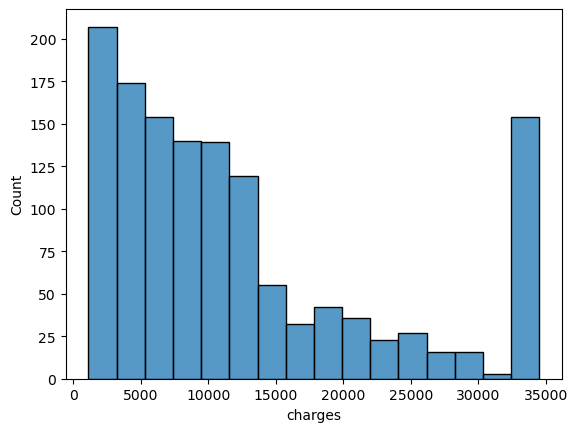

In [121]:
sns.histplot(features['charges'])

In [126]:
X_test.loc[1247]

age                 33.0
bmi                 29.4
children             4.0
smoker               0.0
region_northeast     0.0
region_northwest     0.0
region_southeast     0.0
region_southwest     1.0
Name: 1247, dtype: float64

In [129]:
lr1.predict([[33, 29, 4, 0 , 0, 0, 0 , 1]])

array([7362.55966146])

In [ ]:
lr1.predict(X_test)

In [118]:
y_pre = lr1.predict(X_test)

In [119]:
pd.DataFrame({'y_test':Y_test, 'y_pre':y_pre, 'error':abs(Y_test-y_pre)})

,y_test,y_pre,error
1247,6059.17300,7442.279623,1383.106623
810,9414.92000,10363.417476,948.497476
164,5028.14660,7480.663989,2452.517389
405,11396.90020,13737.714634,2340.814434
638,20149.32290,27356.057655,7206.734755
...,...,...,...
154,7077.18940,8011.110610,933.921210
1229,11938.25595,12777.590082,839.334132
1136,7623.51800,8002.694679,379.176679
518,5240.76500,7112.737882,1871.972882


In [120]:
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     378.7
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          8.81e-267
Time:                        03:57:27   Log-Likelihood:                -9298.2
No. Observations:                 935   AIC:                         1.861e+04
Df Residuals:                     927   BIC:                         1.865e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5764.4105    785.241  

<Axes: xlabel='charges'>

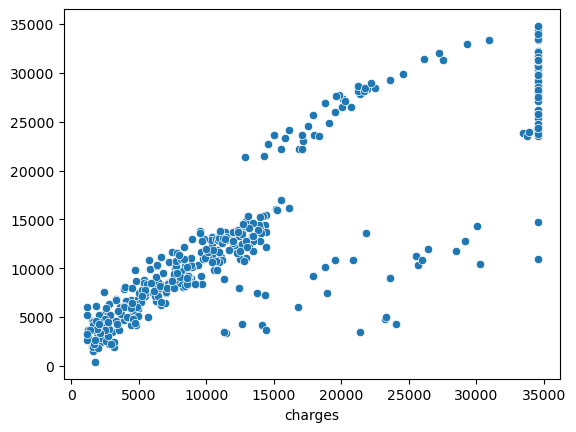

In [132]:
sns.scatterplot(x = Y_test, y= y_pre)

In [131]:
# !pip install explainerdashboard

In [130]:
from explainerdashboard import RegressionExplainer , ExplainerDashboard

explainer = RegressionExplainer(lr1, X_train, Y_train)
ExplainerDashboard(explainer).run()

Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.5.51.14:8050


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_d6c6b8dd-3a00-4589-bb0d-7e9168622757 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000200A11C2450>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [ ]:
VIF(X_test)